In [1]:
import sklearn
import numpy as np
import pickle as pkl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from funcs.utils import *
from funcs.explain import *
import shap
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from funcs.DIMV import DIMVImputation
from funcs.miss_forest import mf

missing_rate = 0.4
nruns = 10
ouput_name = 'XGBRegressor_california_rate08'  

X, y = shap.datasets.california() #(n_points=1000)

def get_split():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns = X_train.columns)

    y_train, y_test = y_train.reshape((-1,1)), y_test.reshape((-1,1))
    scaler_y = StandardScaler()
    scaler_y.fit(y_train)
    y_train = pd.DataFrame(scaler_y.transform(y_train))
    y_test = pd.DataFrame(scaler_y.transform(y_test))    
    X_train_star = generate_missing_data(X_train, rate=missing_rate)
    X_test_star = generate_missing_data(X_test, rate=missing_rate) 
    return X_train, X_train_star, y_train, X_test, X_test_star, y_test

chosen_model = xgboost.XGBRegressor(n_estimators=100, max_depth=2)


Instructions for updating:
non-resource variables are not supported in the long term


# Generate missing data, impute, and use SHAP to explain

In [2]:
results = []
for i in range(nruns):
    X_train, X_train_star, y_train, X_test, X_test_star, y_test = get_split()
    print('iteration:',i)
    results.append(one_run(X_train, X_train_star, y_train, X_test, X_test_star, y_test, chosen_model))

iteration: 0


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.14it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.28it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.27it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.34it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.25it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.27it/s]


Validation result: best alpha 0.0, best score 0.8408149328142516, scores {0.0: 0.8408149328142516, 0.01: 0.8411396038102813, 0.1: 0.8480734291065275, 1.0: 0.9050634634762391, 10.0: 1.0001070075490874, 100.0: 1.0233558365801745}
Value alpha used in for transforming is: 0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.41it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.29it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.13it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.21it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.89it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.30it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.38it/s]


Validation result: best alpha 0.0, best score 0.8408149328142516, scores {0.0: 0.8408149328142516, 0.01: 0.8411396038102813, 0.1: 0.8480734291065275, 1.0: 0.9050634634762392, 10.0: 1.0001070075490874, 100.0: 1.0233558365801745}
Value alpha used in for transforming is: 0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 40.92it/s]


loss 0.20124585288932026
loss 0.0524696237519464
loss 0.05410887628113871
loss 0.06850759410758338
loss 0.08793072645927034
loss 0.11759907218593792
loss 0.14857553305852456
loss 0.18214831297761463
loss 0.20569634357916913
loss 0.2307620834798551
number of runs used by missForest: 10
loss: 0.2307620834798551
loss 0.07373569338273318
loss 0.0763846192419503
loss 0.09704737705808114
loss 0.09496307864803533
loss 0.06425493709735461
loss 0.05937664299481677
loss 0.09146523544927887
loss 0.17656227383899015
loss 0.17659527556121615
loss 0.20170804926812638
number of runs used by missForest: 10
loss: 0.20170804926812638



100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 539.45it/s]


iteration: 1


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.05it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.27it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.27it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.20it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.14it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.23it/s]


Validation result: best alpha 0.0, best score 0.8590446670627863, scores {0.0: 0.8590446670627863, 0.01: 0.8595107663025161, 0.1: 0.8654667225626079, 1.0: 0.9174012842210352, 10.0: 1.0107468267710138, 100.0: 1.034093496004717}
Value alpha used in for transforming is: 0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.43it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.19it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.14it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.18it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.24it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.21it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.25it/s]


Validation result: best alpha 0.0, best score 0.8590446670627863, scores {0.0: 0.8590446670627863, 0.01: 0.8595107663025162, 0.1: 0.865466722562608, 1.0: 0.9174012842210348, 10.0: 1.0107468267710138, 100.0: 1.0340934960047168}
Value alpha used in for transforming is: 0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 41.02it/s]


loss 0.19659112675268933
loss 0.05374941793932169
loss 0.05258670875300018
loss 0.06337254233107535
loss 0.0832495181425328
loss 0.10636401323643671
loss 0.13982387185139258
loss 0.17478735726217676
loss 0.2095395800038427
loss 0.24406001179223918
number of runs used by missForest: 10
loss: 0.24406001179223918
loss 0.19991789738107907
loss 0.05528310505360086
loss 0.059059194913935076
loss 0.07513638874552832
loss 0.0917110463814072
loss 0.11982773858833268
loss 0.15274330515842888
loss 0.18843025765424543
loss 0.22028144570165792
loss 0.2605590376136441
number of runs used by missForest: 10
loss: 0.2605590376136441


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 576.80it/s]


iteration: 2


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.01it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.25it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.23it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.26it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.12it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.19it/s]


Validation result: best alpha 0.01, best score 0.7523054875252883, scores {0.0: 0.7525314246272277, 0.01: 0.7523054875252883, 0.1: 0.7559211960394958, 1.0: 0.8026910423980312, 10.0: 0.8840986775976615, 100.0: 0.9042588292470863}
Value alpha used in for transforming is: 0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.47it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.24it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.32it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.24it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.19it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.25it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.22it/s]


Validation result: best alpha 0.01, best score 0.7523054875252881, scores {0.0: 0.7525314246272277, 0.01: 0.7523054875252881, 0.1: 0.7559211960394959, 1.0: 0.8026910423980312, 10.0: 0.8840986775976614, 100.0: 0.9042588292470864}
Value alpha used in for transforming is: 0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 41.01it/s]


loss 0.2686251791086749
loss 0.11199375111283111
loss 0.08819993726397955
loss 0.11845289272724623
loss 0.14977660141549504
loss 0.1818944557586953
loss 0.21164144438122526
loss 0.2507022437078019
loss 0.27781407174292483
loss 0.30847953951553964
number of runs used by missForest: 10
loss: 0.30847953951553964
loss 0.28130327887276607
loss 0.1674230868877359
loss 0.14511797065129825
loss 0.09817068772256296
loss 0.16892131489855938
loss 0.11257619792206781
loss 0.1329118675464691
loss 0.1832995692162132
loss 0.19869389934595108
loss 0.27777208450447893
number of runs used by missForest: 10
loss: 0.27777208450447893


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 575.69it/s]


iteration: 3


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.03it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.31it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.27it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.21it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.24it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.19it/s]


Validation result: best alpha 0.1, best score 0.8205070980598288, scores {0.0: 0.8476983803350331, 0.01: 0.8751395335062917, 0.1: 0.8205070980598288, 1.0: 0.8724788005304833, 10.0: 0.9791895125876823, 100.0: 1.0053143019527027}
Value alpha used in for transforming is: 0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.34it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.18it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.27it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.23it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.12it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.19it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.23it/s]


Validation result: best alpha 0.1, best score 0.8205070980598288, scores {0.0: 0.8476983803350331, 0.01: 0.8751395335062916, 0.1: 0.8205070980598288, 1.0: 0.8724788005304833, 10.0: 0.9791895125876822, 100.0: 1.0053143019527027}
Value alpha used in for transforming is: 0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 41.44it/s]


loss 0.22380700883203644
loss 0.05704767323905197
loss 0.05896216724288904
loss 0.06729839370818531
loss 0.0861938125548461
loss 0.10366483020268025
loss 0.13673703067451945
loss 0.17177825923452508
loss 0.20125189657717082
loss 0.24493214583041986
number of runs used by missForest: 10
loss: 0.24493214583041986
loss 0.2063087879272926
loss 0.07316093496252114
loss 0.058811918008714596
loss 0.06998520696477802
loss 0.09914953873333865
loss 0.10981997648046453
loss 0.15933567084068676
loss 0.21175201184614603
loss 0.3358638754692889
loss 0.42717185076154124
number of runs used by missForest: 10
loss: 0.42717185076154124


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 564.85it/s]


iteration: 4


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.95it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.08it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.18it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.24it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.21it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.11it/s]


Validation result: best alpha 0.1, best score 0.8894412182604677, scores {0.0: 0.8956949977573933, 0.01: 0.8924843324828989, 0.1: 0.8894412182604677, 1.0: 0.9360059769402319, 10.0: 1.0236834355761495, 100.0: 1.0455368539222172}
Value alpha used in for transforming is: 0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.22it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.19it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.19it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.29it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.24it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.14it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.15it/s]


Validation result: best alpha 0.1, best score 0.8894412182604677, scores {0.0: 0.8956949977573933, 0.01: 0.8924843324828987, 0.1: 0.8894412182604677, 1.0: 0.9360059769402318, 10.0: 1.0236834355761495, 100.0: 1.0455368539222172}
Value alpha used in for transforming is: 0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 41.23it/s]


loss 0.28764374431808687
loss 0.09058172523460505
loss 0.0825653773790583
loss 0.06984413803614634
loss 0.09756996860155437
loss 0.10006222357142693
loss 0.12208515983358798
loss 0.19335278347181387
loss 0.28067056819845504
loss 0.30909490187675354
number of runs used by missForest: 10
loss: 0.30909490187675354
loss 0.26658045891507526
loss 0.05528512306021751
loss 0.05571535248753041
loss 0.0669350690599265
loss 0.08712945942069841
loss 0.11453985909916037
loss 0.15080481655037345
loss 0.19220764825724948
loss 0.2503027452895022
loss 0.28148060616055315
number of runs used by missForest: 10
loss: 0.28148060616055315


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 518.92it/s]


iteration: 5


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.81it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.97it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.04it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.02it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.01it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.97it/s]


Validation result: best alpha 0.1, best score 0.8095582199616739, scores {0.0: 1.274155497214723, 0.01: 0.8596292299294036, 0.1: 0.8095582199616739, 1.0: 0.8497532983247716, 10.0: 0.9312745524149865, 100.0: 0.9517570602563964}
Value alpha used in for transforming is: 0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.81it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.08it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.99it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.09it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.97it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.15it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.07it/s]


Validation result: best alpha 0.1, best score 0.8095582199616739, scores {0.0: 1.2741554972147233, 0.01: 0.8596292299294037, 0.1: 0.8095582199616739, 1.0: 0.8497532983247716, 10.0: 0.9312745524149865, 100.0: 0.9517570602563963}
Value alpha used in for transforming is: 0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 41.02it/s]


loss 0.24451034056923532
loss 0.11665175867088529
loss 0.11367471697259134
loss 0.12083392782890433
loss 0.12996515330140354
loss 0.1725210210679406
loss 0.21907790887750803
loss 0.24482265070314635
loss 0.2723747316950711
loss 0.31977479091309513
number of runs used by missForest: 10
loss: 0.31977479091309513
loss 0.24648818822075413
loss 0.10359896447213597
loss 0.09414624692391016
loss 0.1426016124250881
loss 0.1607725377256764
loss 0.16580425164084525
loss 0.19741770450180415
loss 0.23526423641536903
loss 0.27664561511097524
loss 0.3024451854060268
number of runs used by missForest: 10
loss: 0.3024451854060268


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 553.38it/s]


iteration: 6


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.84it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.08it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.08it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.05it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.98it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.95it/s]


Validation result: best alpha 0.01, best score 0.8556841484726504, scores {0.0: 0.8557547685224722, 0.01: 0.8556841484726504, 0.1: 0.8613607864216717, 1.0: 0.9179301738626701, 10.0: 1.01666714543589, 100.0: 1.0409968289553029}
Value alpha used in for transforming is: 0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.05it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.10it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.10it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.02it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.93it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.05it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.05it/s]


Validation result: best alpha 0.01, best score 0.8556841484726506, scores {0.0: 0.8557547685224722, 0.01: 0.8556841484726506, 0.1: 0.8613607864216717, 1.0: 0.9179301738626701, 10.0: 1.01666714543589, 100.0: 1.0409968289553027}
Value alpha used in for transforming is: 0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 40.60it/s]


loss 0.2264935010316268
loss 0.06763303077699477
loss 0.05831073461324375
loss 0.06916784189195171
loss 0.08479529808023675
loss 0.11015626912344964
loss 0.1350627178416051
loss 0.1699567507065299
loss 0.19968665635849983
loss 0.23242040972703493
number of runs used by missForest: 10
loss: 0.23242040972703493
loss 0.24501969773478177
loss 0.07891924623359362
loss 0.0651419267229282
loss 0.08399247224457004
loss 0.10377120825732458
loss 0.13265880634903982
loss 0.16676476142637411
loss 0.21166433330628512
loss 0.2437292816949811
loss 0.28193726097007066
number of runs used by missForest: 10
loss: 0.28193726097007066


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 541.40it/s]


iteration: 7


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.83it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.94it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.02it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.05it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.05it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.02it/s]


Validation result: best alpha 0.01, best score 0.8081855967458695, scores {0.0: 0.8086851475817787, 0.01: 0.8081855967458695, 0.1: 0.8107121455484952, 1.0: 0.8528887886762385, 10.0: 0.9319685308932145, 100.0: 0.9519839596388525}
Value alpha used in for transforming is: 0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.31it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.94it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.99it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.99it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.96it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.96it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.95it/s]


Validation result: best alpha 0.01, best score 0.8081855967458695, scores {0.0: 0.8086851475817787, 0.01: 0.8081855967458695, 0.1: 0.8107121455484952, 1.0: 0.8528887886762384, 10.0: 0.9319685308932145, 100.0: 0.9519839596388524}
Value alpha used in for transforming is: 0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 39.59it/s]


loss 0.2392224417491587
loss 0.0723871323873131
loss 0.06333486969367258
loss 0.07656400729774812
loss 0.09396926184953192
loss 0.12010811229247509
loss 0.14993575818009566
loss 0.181403333861834
loss 0.2170450998340908
loss 0.24673642981610122
number of runs used by missForest: 10
loss: 0.24673642981610122
loss 0.23495773803823278
loss 0.06757795073148533
loss 0.06865354969991799
loss 0.08682239667067457
loss 0.12921497929532752
loss 0.16497074951139387
loss 0.19904340828660738
loss 0.24425384551331314
loss 0.2626906003665992
loss 0.2890064173271328
number of runs used by missForest: 10
loss: 0.2890064173271328


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 528.98it/s]


iteration: 8


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.86it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.97it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.01it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.06it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.01it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.02it/s]


Validation result: best alpha 0.1, best score 0.8197365483411186, scores {0.0: 0.8367032188387264, 0.01: 0.8247946341681166, 0.1: 0.8197365483411186, 1.0: 0.8286338984172733, 10.0: 0.9618758966107208, 100.0: 0.9937788451331193}
Value alpha used in for transforming is: 0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.85it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.03it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.04it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.03it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.07it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.99it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.93it/s]


Validation result: best alpha 0.1, best score 0.8197365483411188, scores {0.0: 0.8367032188387266, 0.01: 0.8247946341681166, 0.1: 0.8197365483411188, 1.0: 0.8286338984172734, 10.0: 0.9618758966107207, 100.0: 0.9937788451331193}
Value alpha used in for transforming is: 0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 40.60it/s]


loss 0.19430166975698449
loss 0.0588244302218269
loss 0.05975019828217755
loss 0.07268081312557008
loss 0.10108598953840521
loss 0.13791989043662806
loss 0.16830143636016176
loss 0.22076707598658155
loss 0.25297860841089564
loss 0.2882978820709525
number of runs used by missForest: 10
loss: 0.2882978820709525
loss 0.20255271669571212
loss 0.06002350933635336
loss 0.07149461348142844
loss 0.07940061531760646
loss 0.10225148930965484
loss 0.12893670342885757
loss 0.16474757766167533
loss 0.2162406541279622
loss 0.25443637458496415
loss 0.2896746066046159
number of runs used by missForest: 10
loss: 0.2896746066046159


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 520.73it/s]


iteration: 9


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.75it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.94it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.87it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.92it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.80it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.93it/s]


Validation result: best alpha 0.01, best score 0.7867999870836508, scores {0.0: 0.7890829872965303, 0.01: 0.7867999870836508, 0.1: 0.7869174349605846, 1.0: 0.8344674374020351, 10.0: 0.9193942327389704, 100.0: 0.9404124343588699}
Value alpha used in for transforming is: 0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.58it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.90it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.94it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.89it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.68it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.84it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.87it/s]


Validation result: best alpha 0.01, best score 0.7867999870836508, scores {0.0: 0.7890829872965303, 0.01: 0.7867999870836508, 0.1: 0.7869174349605846, 1.0: 0.8344674374020351, 10.0: 0.9193942327389704, 100.0: 0.9404124343588699}
Value alpha used in for transforming is: 0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 40.19it/s]


loss 0.2565268760553318
loss 0.06396132567602596
loss 0.08122430394102031
loss 0.09677672855988259
loss 0.1187260099754806
loss 0.15723274761838255
loss 0.16307499099866188
loss 0.21183512958833728
loss 0.2447412166690501
loss 0.26988238827178856
number of runs used by missForest: 10
loss: 0.26988238827178856
loss 0.23939255472224358
loss 0.082267675270416
loss 0.08008980532112982
loss 0.10336144787331894
loss 0.13224775146434609
loss 0.1576972850004377
loss 0.20439675065126156
loss 0.22755236898209918
loss 0.2716480736421206
loss 0.3019325058106001
number of runs used by missForest: 10
loss: 0.3019325058106001


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 511.93it/s]


So, the first layer of results is the result of each run. Then, for the sub-level:
- level 0: shape_values_ori, shap_values_xm...
- level 1:  other_measures = [mse_imputation_all, mse_shap_all, mse_ypred_all, cor_ypred_all, spearman_ypred]

In [3]:
def get_average_shap_vals(results, j, nruns):
    # get the average shap values from all runs for each imputation method or the original 
    current = results[0][0][j]
    for i in range(1, nruns):
        current.values += results[i][0][j].values
        current.base_values += results[i][0][j].base_values
        current.data += results[i][0][j].data  
    current.values = current.values/nruns
    current.base_values = current.base_values/nruns
    current.data = current.data/nruns
    return current

In [4]:
shap_values_ori = get_average_shap_vals(results, j = 0, nruns= nruns)
shap_values_xm = get_average_shap_vals(results, j = 1, nruns= nruns)
shap_values_mi = get_average_shap_vals(results, j = 2, nruns = nruns)
shap_values_mice = get_average_shap_vals(results, j = 3, nruns= nruns)
shap_values_dimv = get_average_shap_vals(results, j = 4, nruns= nruns)
shap_values_mf = get_average_shap_vals(results, j = 5, nruns= nruns)
shap_values_soft = get_average_shap_vals(results, j = 6, nruns= nruns)
shap_values_gain = get_average_shap_vals(results, j = 7, nruns= nruns)

In [5]:
ranking_res = shap_ranking_table(X_train, shap_values_ori,shap_values_xm, shap_values_mi, shap_values_mice,
                   shap_values_dimv, shap_values_mf, shap_values_soft, shap_values_gain)

combined_feature_importance
\begin{tabular}{lrrrrrrrr}
\toprule
 & Original & Xgb on missing data & Mean Imputation & MICE & DIMV & missForest & SOFT-IMPUTE & GAIN \\
Ranking &  &  &  &  &  &  &  &  \\
\midrule
Latitude & 0.196 & 0.374 & 0.057 & 0.084 & 0.111 & 0.079 & 0.078 & 0.051 \\
Longitude & 0.189 & 0.451 & 0.060 & 0.081 & 0.103 & 0.078 & 0.064 & 0.059 \\
MedInc & 0.139 & 0.693 & 0.109 & 0.126 & 0.117 & 0.111 & 0.115 & 0.110 \\
AveOccup & 0.056 & 0.080 & 0.051 & 0.042 & 0.049 & 0.053 & 0.051 & 0.050 \\
AveRooms & 0.021 & 0.097 & 0.042 & 0.023 & 0.034 & 0.044 & 0.038 & 0.035 \\
HouseAge & 0.017 & 0.060 & 0.020 & 0.024 & 0.025 & 0.019 & 0.025 & 0.019 \\
AveBedrms & 0.012 & 0.021 & 0.009 & 0.014 & 0.014 & 0.011 & 0.013 & 0.010 \\
Population & 0.005 & 0.013 & 0.003 & 0.005 & 0.009 & 0.008 & 0.006 & 0.010 \\
\bottomrule
\end{tabular}



In [6]:
    j = 0
    mse_now = results[0][1][j]
    for i in range(1, nruns):
        mse_now += results[i][1][j]
    mse_imputation_all = mse_now/nruns  
    print("the MSE between the imputed X_test of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original X_test:")
    print(mse_imputation_all.round(3))

    j = 1
    mse_now = results[0][1][j]
    for i in range(1, nruns):
        mse_now += results[i][1][j]    
    mse_shap_all = mse_now/nruns 
    print("the MSE between the Shapley values of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original:")
    print(mse_shap_all.round(3))

    j = 2
    mse_ypred_now = results[0][1][j]
    for i in range(1, nruns):
        mse_ypred_now += results[i][1][j]    
    mse_ypred_all = mse_ypred_now/nruns 
    print("the MSE between y predicted on test set of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original:")
    print(mse_ypred_all.round(3))

    j = 3
    mse_ypred_now = results[0][1][j]
    for i in range(1, nruns):
        mse_ypred_now += results[i][1][j]    
    spearman_ypred = mse_ypred_now/nruns 
    print("the ranking correlation for spearman rank correlation between the predicted y on test set of original data and y predicted on imputed data")
    print(spearman_ypred.round(3))

    j = 4
    mse_ypred_now = results[0][1][j]
    for i in range(1, nruns):
        mse_ypred_now += results[i][1][j]    
    spearman_ypred = mse_ypred_now/nruns 
    print("the ranking correlation for spearman rank correlation between imputed features")
    print(spearman_ypred.round(3))

the MSE between the imputed X_test of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original X_test:
[ 0.465  6.369  0.558  0.5    0.383 29.672]
the MSE between the Shapley values of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original:
[0.346 0.136 0.09  0.073 0.097 0.106 0.151]
the MSE between y predicted on test set of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original:
[0.231 0.243 0.263 0.26  0.233 0.254 0.293]
the ranking correlation for spearman rank correlation between the predicted y on test set of original data and y predicted on imputed data
[[0.823 0.   ]
 [0.812 0.   ]
 [0.79  0.   ]
 [0.795 0.   ]
 [0.815 0.   ]
 [0.802 0.   ]
 [0.769 0.   ]]
the ranking correlation for spearman rank correlation between imputed features
[[ 0.405  0.366  0.346  0.503  0.461  0.524  0.501  0.479]
 [ 0.785  0.562  0.571 -0.033 -0.022  0.698  0.599  0.417]
 [ 0.815  0.582  0.301  0.503  0.39   0.626  0.817  0.775]
 [ 0.808  0.617  0.281  0.35

In [7]:
dfplot = pd.DataFrame({'MSE':np.hstack((0,mse_imputation_all)), 'Spearman statistic': spearman_ypred[:,0]}, index = ['Xgb on missing data','Mean Imputation','MICE','DIMV','missForest','SOFT-IMPUTE','GAIN'])
dfplot

,MSE,Spearman statistic
Xgb on missing data,0.000000,0.404713
Mean Imputation,0.464618,0.785219
MICE,6.368534,0.814683
DIMV,0.558429,0.807684
missForest,0.500453,0.793043
SOFT-IMPUTE,0.382520,0.808780
GAIN,29.672274,0.655609


imputation MSE versus Spearman statistic


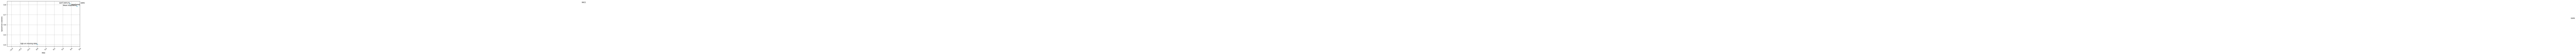

In [8]:
print('imputation MSE versus Spearman statistic')
plt.figure(figsize=(8, 5))
plt.scatter(dfplot['MSE'], dfplot['Spearman statistic'], color='skyblue')
for i, row in dfplot.iterrows():
    if row.name == 'MICE':
        plt.text(row['MSE'],row['Spearman statistic'], row.name, ha='left', va='bottom')
    else:
        plt.text(row['MSE'],row['Spearman statistic'], row.name, ha='right', va='bottom') 
plt.ylabel('Spearman statistic')
plt.xlabel('MSE')
plt.xlim(-.35, 0.5)
plt.xticks(rotation=45)
plt.grid(True)  # Adding grid for better visualization
plt.savefig('results/'+ ouput_name+'imputation_mse_spearman'+'.png',bbox_inches='tight')
plt.show()

In [9]:
dfplot = pd.DataFrame({'MSE on y test':mse_ypred_all, 'MSE Shap': mse_shap_all}, index = dfplot.index)
dfplot

,MSE on y test,MSE Shap
Xgb on missing data,0.230720,0.346399
Mean Imputation,0.242867,0.135688
MICE,0.262542,0.090044
DIMV,0.260092,0.073428
missForest,0.233267,0.097500
SOFT-IMPUTE,0.254073,0.106346
GAIN,0.293395,0.151414


imputation MSE versus Shapley MSE


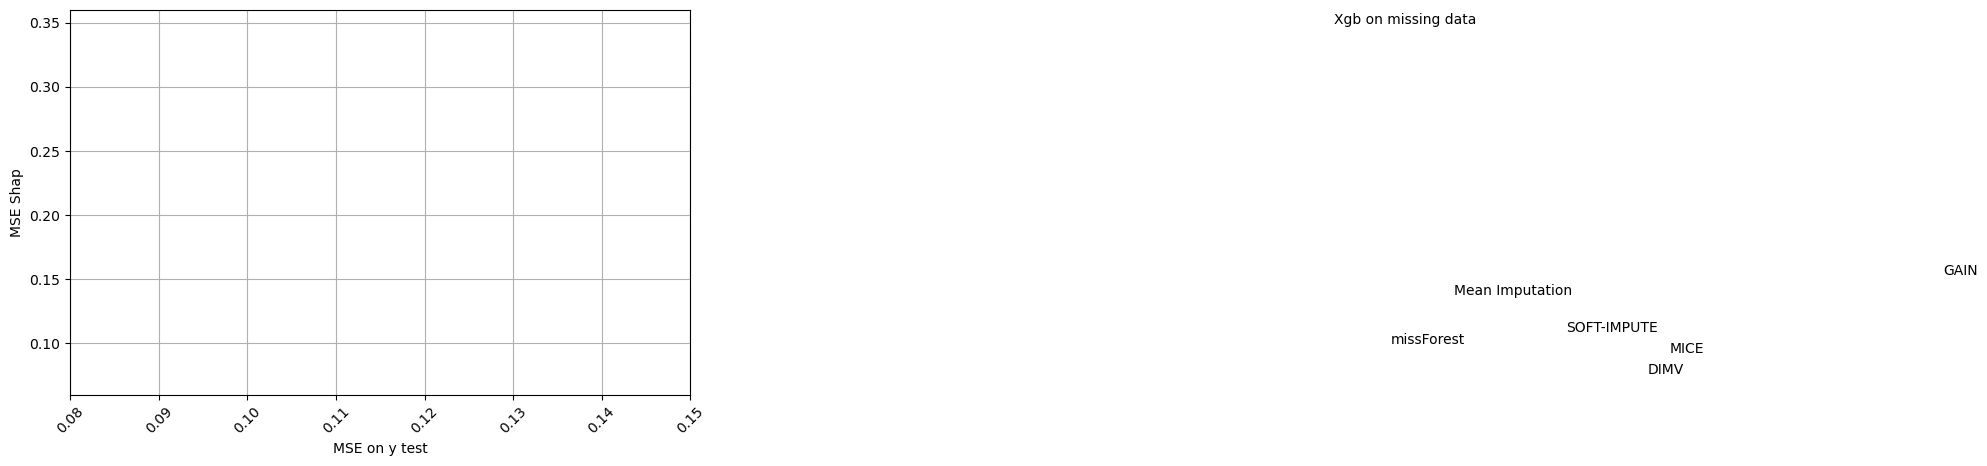

In [10]:
print('imputation MSE versus Shapley MSE')
plt.figure(figsize=(8, 5))
plt.scatter(dfplot['MSE on y test'],dfplot['MSE Shap'], color='skyblue')
for i, row in dfplot.iterrows():
    plt.text(row['MSE on y test'],row['MSE Shap'], row.name, ha='center', va='bottom')
plt.ylabel('MSE Shap')
plt.xlabel('MSE on y test')
plt.xlim(0.08, 0.15)
plt.xticks(rotation=45)
plt.grid(True)  # Adding grid for better visualization
plt.savefig('results/'+ ouput_name+'imputation_mse_vs_shap_mse'+'.png',bbox_inches='tight')
plt.show()

In [11]:
dfplot = pd.DataFrame({'MSE':np.hstack((0,mse_imputation_all)), 'MSE Shap': mse_shap_all}, index = dfplot.index)
dfplot

,MSE,MSE Shap
Xgb on missing data,0.000000,0.346399
Mean Imputation,0.464618,0.135688
MICE,6.368534,0.090044
DIMV,0.558429,0.073428
missForest,0.500453,0.097500
SOFT-IMPUTE,0.382520,0.106346
GAIN,29.672274,0.151414


imputation MSE versus Shapley MSE


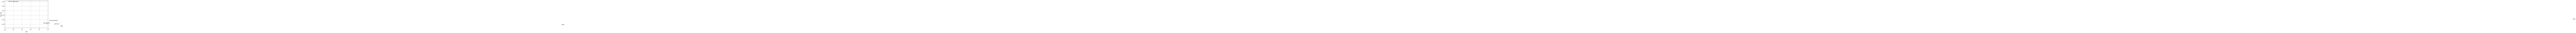

In [12]:
print('imputation MSE versus Shapley MSE')
plt.figure(figsize=(8, 5))
plt.scatter(dfplot['MSE'],dfplot['MSE Shap'], color='skyblue')
for i, row in dfplot.iterrows():
    plt.text(row['MSE'],row['MSE Shap'], row.name, ha='center', va='bottom')
plt.ylabel('MSE Shap')
plt.xlabel('MSE')
plt.xlim(-0.1, 0.4)
plt.xticks(rotation=45)
plt.grid(True)  # Adding grid for better visualization
plt.savefig('results/'+ ouput_name+'imputation_mse_vs_shap_mse'+'.png',bbox_inches='tight')
plt.show()

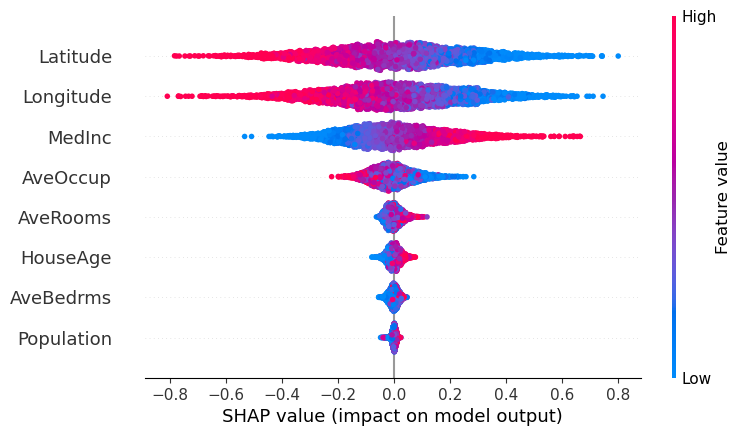

In [13]:
plt.figure()
shap.plots.beeswarm(shap_values_ori, max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'ori'+'.png',bbox_inches='tight')
plt.show()

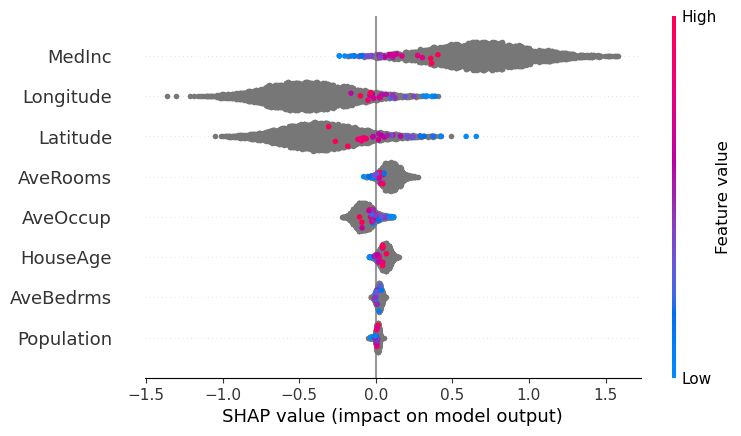

In [14]:
plt.figure()
shap.plots.beeswarm(shap_values_xm, max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'xm'+'.png',bbox_inches='tight')
plt.show()

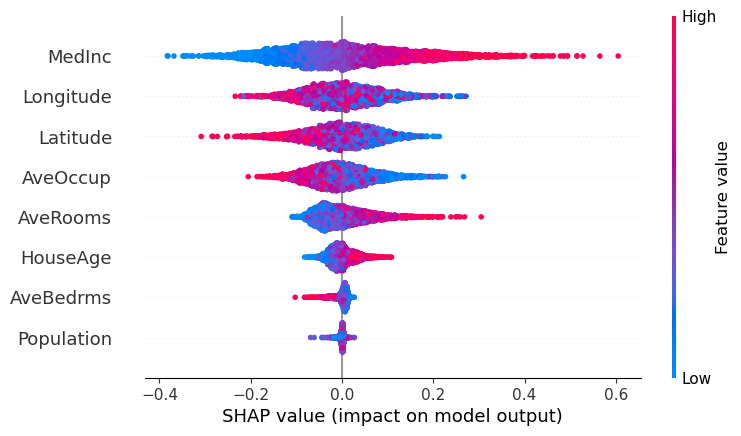

In [15]:
plt.figure()
shap.plots.beeswarm(shap_values_mi, max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'mi'+'.png',bbox_inches='tight')
plt.show()

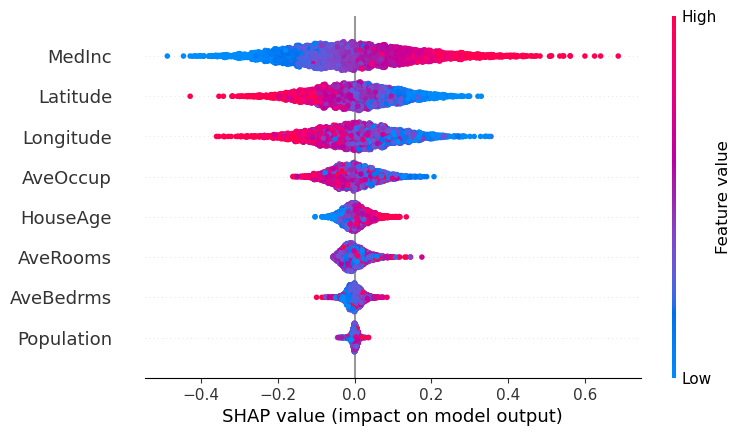

In [16]:
plt.figure()
shap.plots.beeswarm(shap_values_mice, max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'mice'+'.png',bbox_inches='tight')
plt.show()

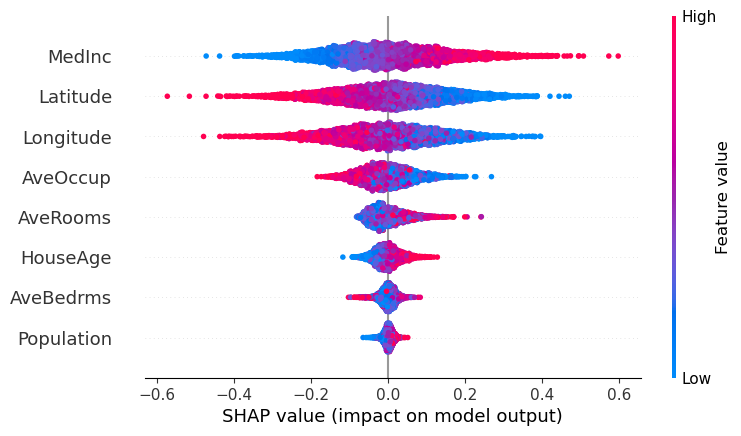

In [17]:
plt.figure()
shap.plots.beeswarm(shap_values_dimv, max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'dimv'+'.png',bbox_inches='tight')
plt.show()

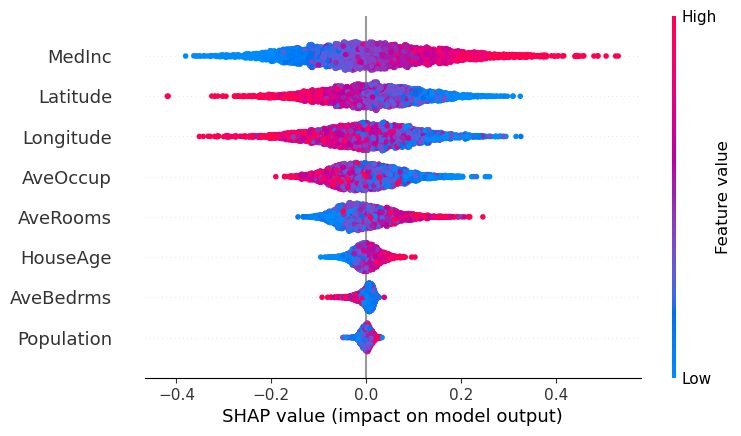

In [18]:
plt.figure()
shap.plots.beeswarm(shap_values_mf, max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'mf'+'.png',bbox_inches='tight')
plt.show()

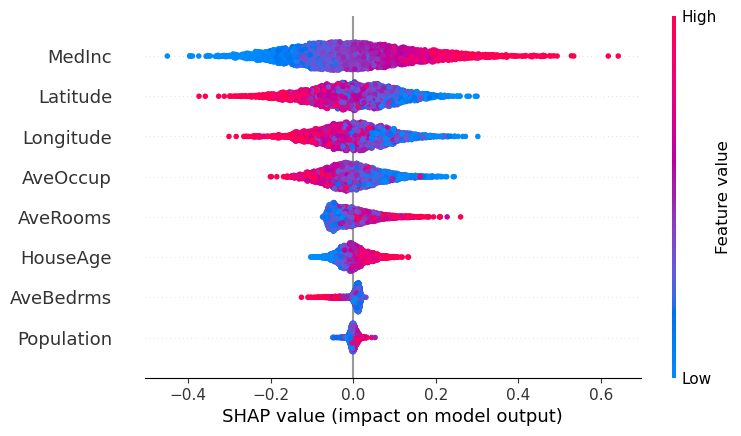

In [19]:
plt.figure()
shap.plots.beeswarm(shap_values_soft, max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'soft'+'.png',bbox_inches='tight')
plt.show()

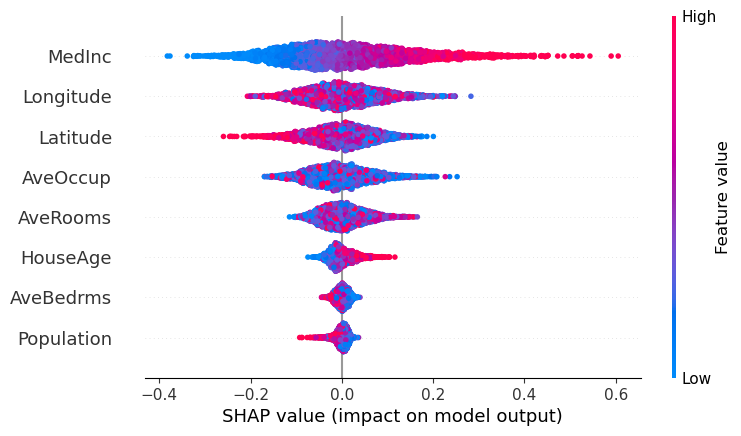

In [20]:
plt.figure()
shap.plots.beeswarm(shap_values_gain, max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'gain'+'.png',bbox_inches='tight')
plt.show()

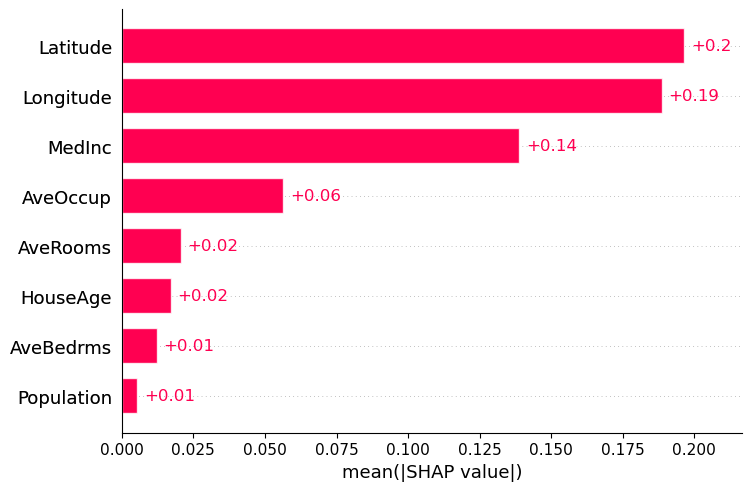

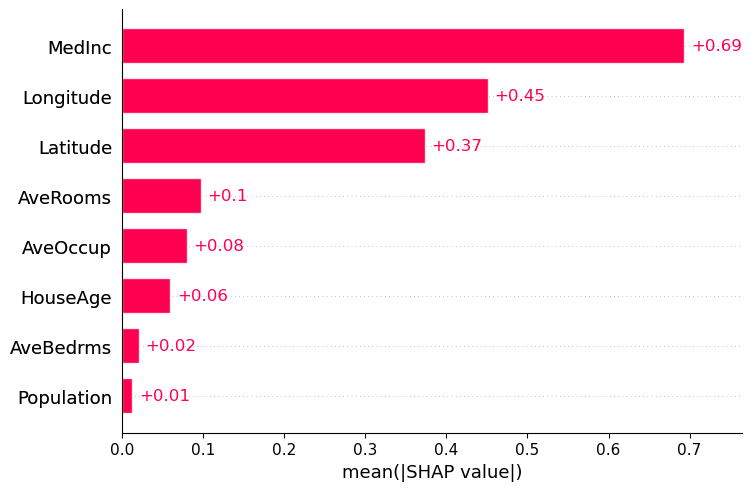

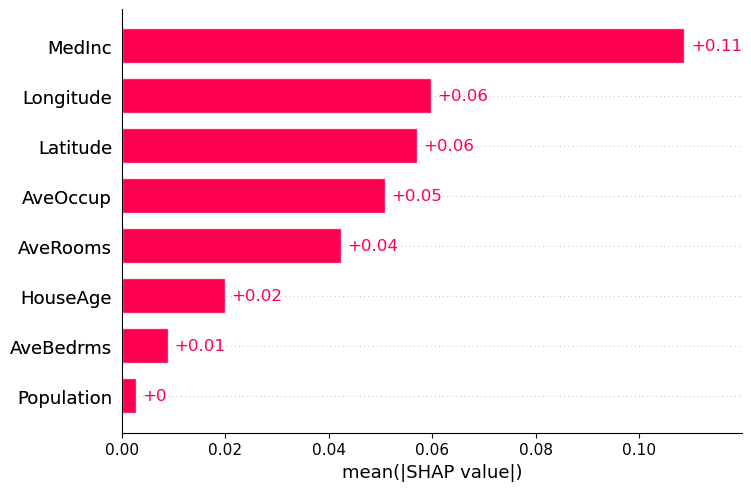

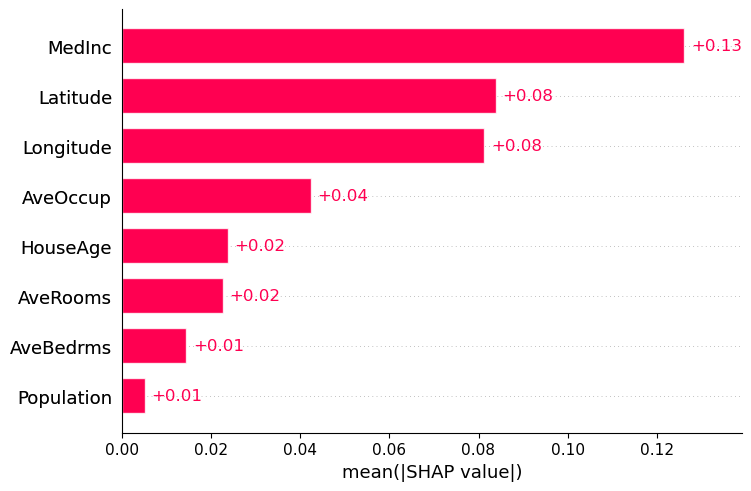

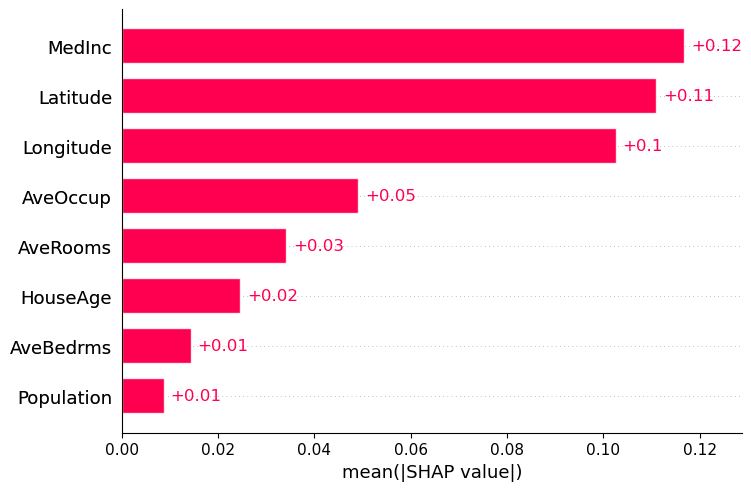

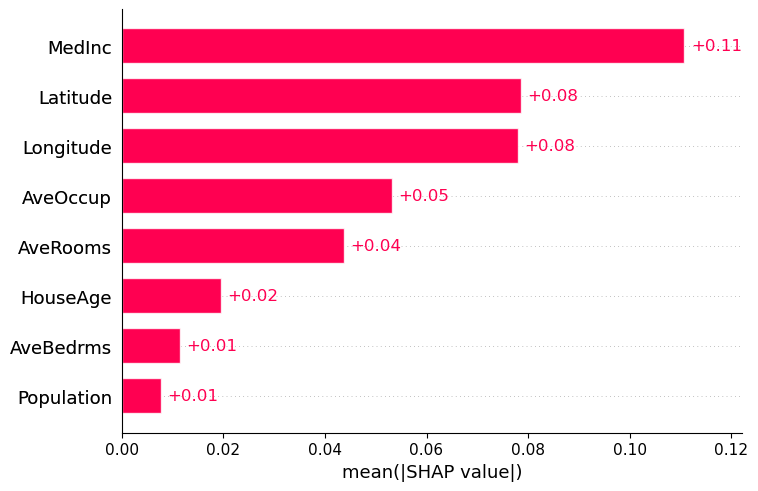

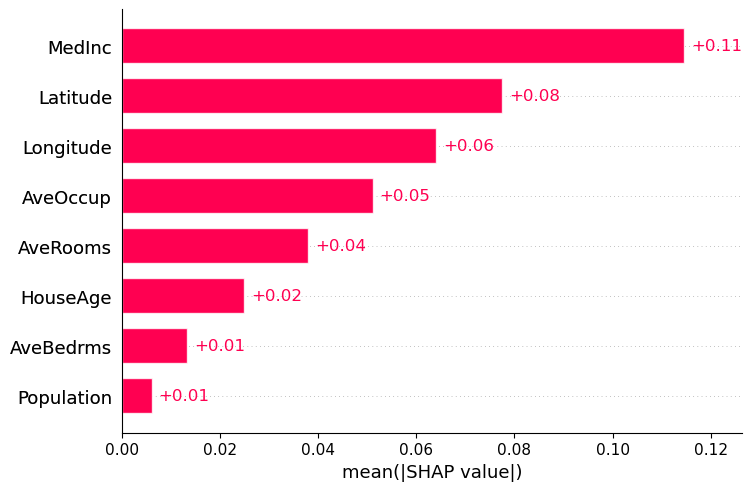

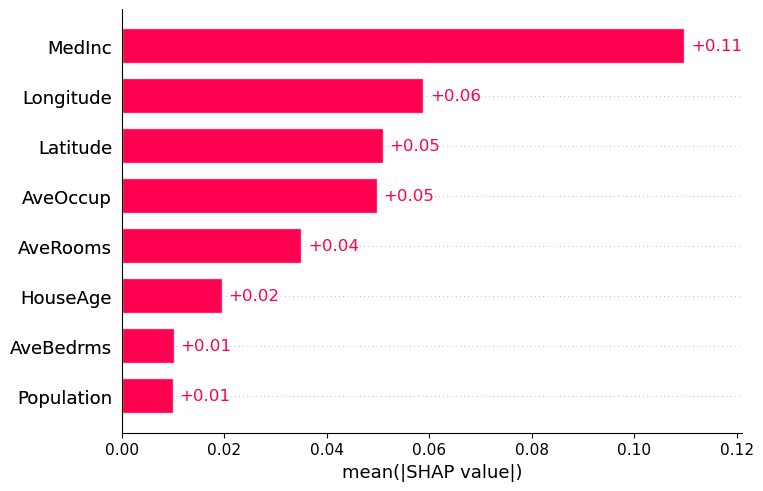

In [21]:
plt.figure()
shap.plots.bar(shap_values_ori, show=False)
plt.savefig('results/'+ouput_name+'bar_ori'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_xm, show=False)
plt.savefig('results/'+ouput_name+'bar_xm'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_mi, show=False)
plt.savefig('results/'+ouput_name+'bar_mi'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_mice, show=False)
plt.savefig('results/'+ouput_name+'bar_mice'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_dimv, show=False)
plt.savefig('results/'+ouput_name+'bar_dimv'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_mf, show=False)
plt.savefig('results/'+ouput_name+'bar_mf'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_soft, show=False)
plt.savefig('results/'+ouput_name+'bar_soft'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_gain, show=False)
plt.savefig('results/'+ouput_name+'bar_gain'+'.png',bbox_inches='tight')

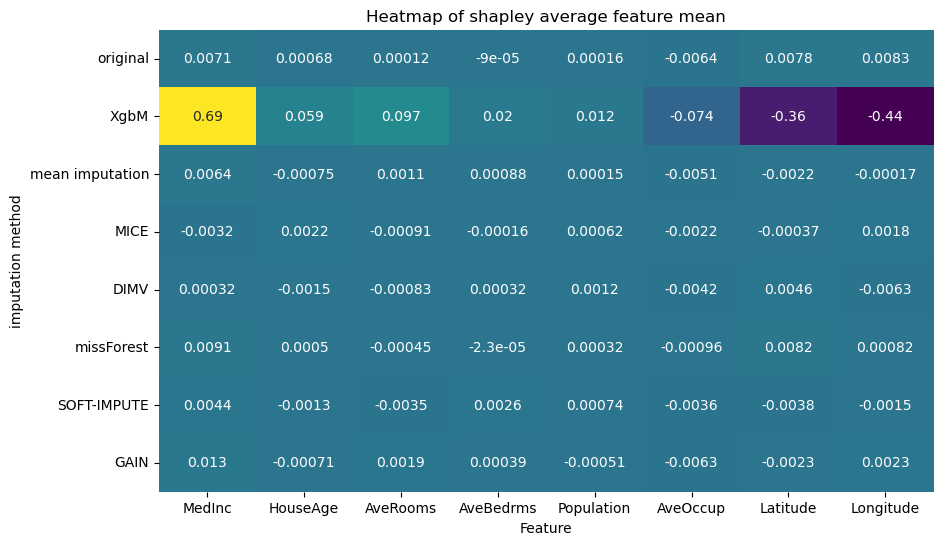

In [22]:
column_mean_ori = np.mean(shap_values_ori.values, axis=0)
column_mean_xm = np.mean(shap_values_xm.values, axis=0)
column_mean_mi = np.mean(shap_values_mi.values, axis=0)
column_mean_mice = np.mean(shap_values_mice.values, axis=0)
column_mean_dimv = np.mean(shap_values_dimv.values, axis=0)
column_mean_mf = np.mean(shap_values_mf.values, axis=0)
column_mean_soft = np.mean(shap_values_soft.values, axis=0)
column_mean_gain = np.mean(shap_values_gain.values, axis=0)
heat_df = pd.DataFrame(np.vstack((column_mean_ori, column_mean_xm,column_mean_mi,column_mean_mice,
                                  column_mean_dimv,column_mean_mf,column_mean_soft, column_mean_gain)))
heat_df.columns = X.columns
heat_df.index = np.array(['original', 'XgbM', 'mean imputation', 'MICE','DIMV','missForest', 'SOFT-IMPUTE', 'GAIN'])
plt.figure(figsize=(10, 6))
sns.heatmap(heat_df, cmap='viridis', annot=True, cbar=False)
plt.title('Heatmap of shapley average feature mean')
plt.xlabel('Feature')
plt.ylabel('imputation method')
plt.savefig('results/'+ouput_name+'heatmap'+'.png',bbox_inches='tight')
plt.show()